# EX2


## Data Analysis using simple plots

- Review the examples of basic visualization using Python libraries and Pandas.

## Advertising data

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

A toy dataset for your exploratory data analysis:

./data/Advertising.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read CSV file stored in the current directory and save the results
data = pd.read_csv('./data/Advertising.csv', skipinitialspace=True, index_col=0)

# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
3/11/19,230.1,37.8,69.2,22.1
3/12/19,44.5,39.3,45.1,10.4
3/13/19,17.2,45.9,69.3,9.3
3/14/19,151.5,41.3,58.5,18.5
3/15/19,180.8,10.8,58.4,12.9


What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

In [3]:
#display all data. You can uncomment the code in the next line
display(data)
data.shape

,TV,Radio,Newspaper,Sales
3/11/19,230.1,37.8,69.2,22.1
3/12/19,44.5,39.3,45.1,10.4
3/13/19,17.2,45.9,69.3,9.3
3/14/19,151.5,41.3,58.5,18.5
3/15/19,180.8,10.8,58.4,12.9
...,...,...,...,...
9/22/19,38.2,3.7,13.8,7.6
9/23/19,94.2,4.9,8.1,9.7
9/24/19,177.0,9.3,6.4,12.8
9/25/19,283.6,42.0,66.2,25.5


(200, 4)

## Part 1 Tasks

Create cells to solve each of the following problems.

(1) For each field of the data, what is the mean of the data? What is the median? Are there any dataset has mode value?

(2) For each field of the data, give the five-number summary, minimum, the first quartile (Q1), median, the third quartile (Q3), and maximum of the data.

(3) For each field of the data, visulize a boxplot of the data and compare it to your answer in (b).

(4) For Sales, visualize distribution of the data using histogram. Comment on the data’s modality (i.e., bimodal, trimodal, etc.)

(5) For Sales, visualize the trend of the data over time using a graph.

(6) For each pair (TV-Sales, Radio-Sales, Newspaper-Sales), calculate the Pearson's correlation coefficient factor r.

(7) For each pair (TV-Sales, Radio-Sales, Newspaper-Sales), visualize scatter graph.

(8) Discuss what the differences are between the three: (a) boxplot, (b) histogram, and (c) scatter plot with respect to founding.

In [4]:
means = data[['TV','Radio','Newspaper','Sales']].mean()
medians = data[['TV','Radio','Newspaper','Sales']].median()
print('Means are \n', means)
print('Medians are \n', medians)

# Check if it has mode is to check if vlaues repeat

for col in data.columns:
    is_unique = data[col].is_unique
    if is_unique:
        print('No mode in column:', col)
    else:
        print('Mode present in column:', col)

Means are 
 TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         14.0225
dtype: float64
Medians are 
 TV           149.75
Radio         22.90
Newspaper     25.75
Sales         12.90
dtype: float64
Mode present in column: TV
Mode present in column: Radio
Mode present in column: Newspaper
Mode present in column: Sales


In [5]:
data[['TV', 'Radio', 'Newspaper','Sales']].describe().loc[['min', '25%', '50%', '75%', 'max']]

,TV,Radio,Newspaper,Sales
min,0.700,0.000,0.30,1.600
25%,74.375,9.975,12.75,10.375
50%,149.750,22.900,25.75,12.900
75%,218.825,36.525,45.10,17.400
max,296.400,49.600,114.00,27.000


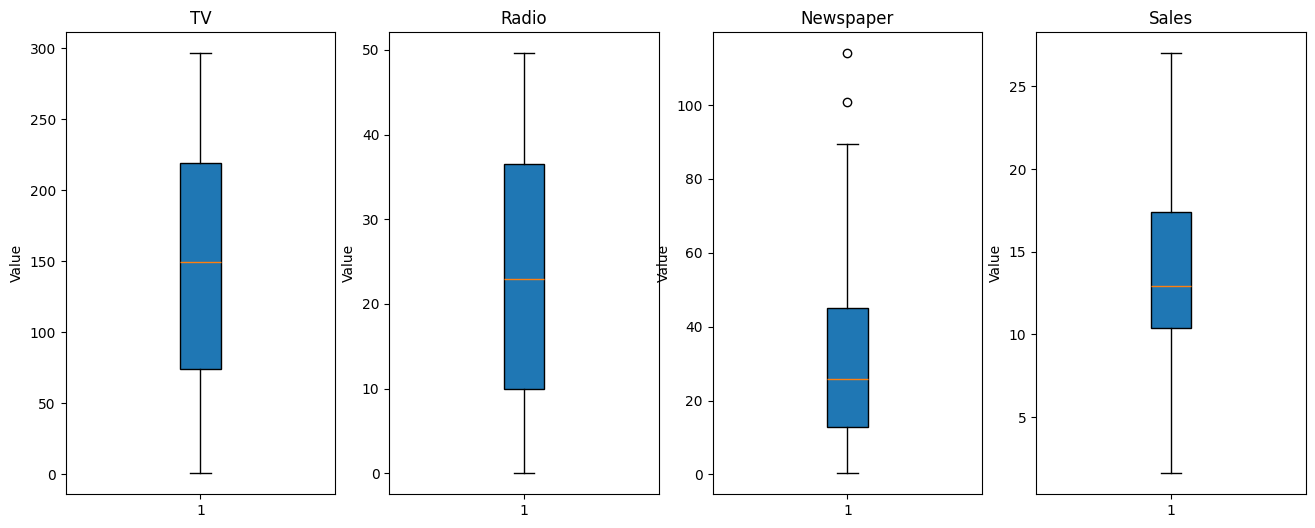

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 6))
columns = ['TV','Radio','Newspaper','Sales']

for i, col in enumerate(columns):
    axes[i].boxplot(data[col], vert=True, patch_artist=True)
    axes[i].set_title(col)
    axes[i].set_ylabel('Value')

    stats = data[col].describe(percentiles=[.25, .5, .75])
    min_val = stats['min']
    q1 = stats['25%']
    med = stats['50%']
    q3 = stats['75%']
    max_val = stats['max']

plt.show()

Text(0, 0.5, 'Frequency')

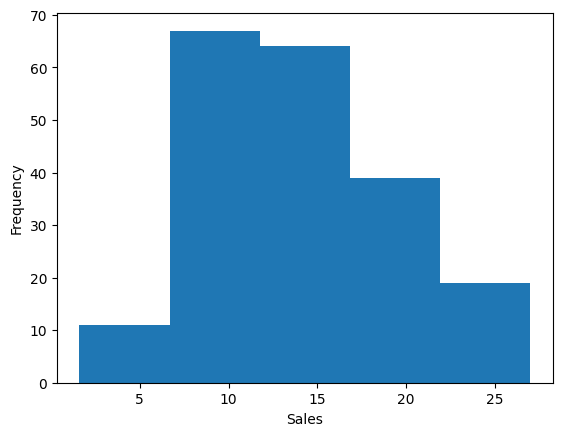

In [7]:
# For Sales, visualize distribution of the data using histogram. Comment on the data’s modality (i.e., bimodal, trimodal, etc.)
plt.hist(data['Sales'], bins=5)
plt.xlabel('Sales')
plt.ylabel('Frequency')

# As from the representation the model looks Unimodal as it has a single peak

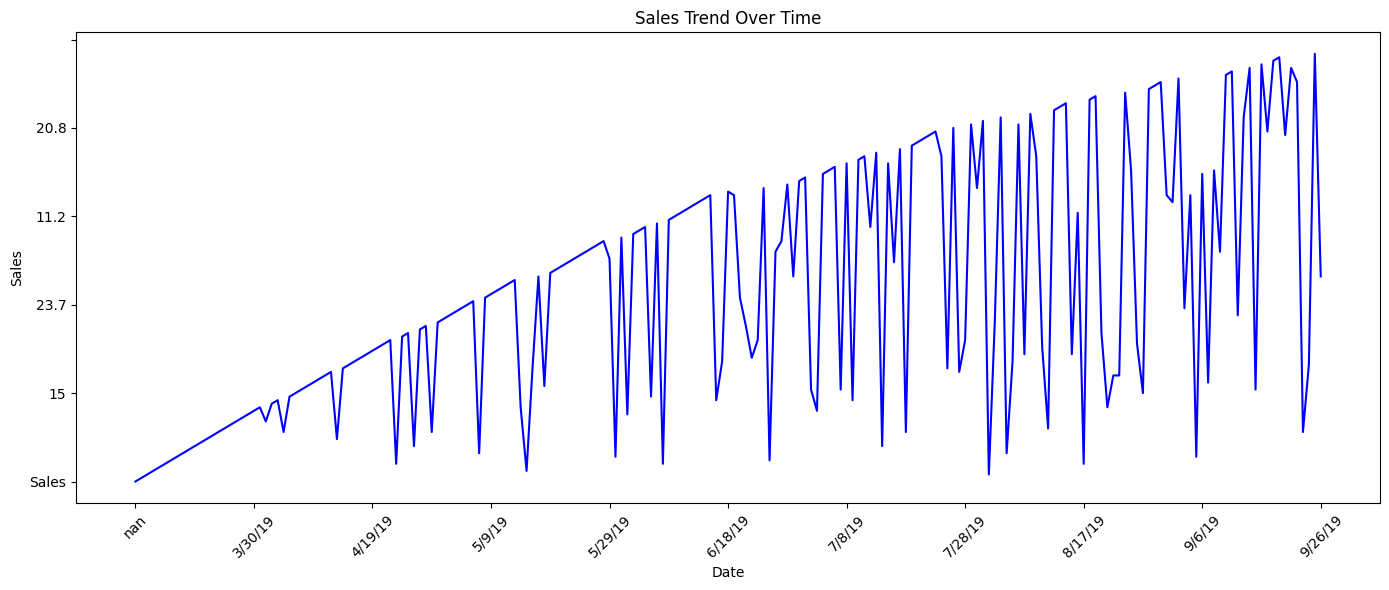

In [9]:
import matplotlib.ticker as ticker
import numpy as np

colnames = ['Date', 'TV', 'Radio', 'Newspaper', 'Sales']
df = pd.read_csv('./data/Advertising.csv', names=colnames, header=None)

df['Date'] = df['Date'].astype(str)

plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Sales'], linestyle='-', color='blue')

step = 20
if len(df) > step:
    plt.xticks(np.arange(0, len(df), step), df['Date'][::step], rotation=45)

plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(nbins=6))

plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

In [12]:
#For each pair (TV-Sales, Radio-Sales, Newspaper-Sales), calculate the Pearson's correlation coefficient factor r.
corr_matrix = data[['TV', 'Radio', 'Newspaper', 'Sales']].corr()

print("Pearson Correlation Coefficients:")
print(f"TV vs Sales:        {corr_matrix.loc['TV', 'Sales']}")
print(f"Radio vs Sales:     {corr_matrix.loc['Radio', 'Sales']}")
print(f"Newspaper vs Sales: {corr_matrix.loc['Newspaper', 'Sales']}")

Pearson Correlation Coefficients:
TV vs Sales:        0.7822244248616067
Radio vs Sales:     0.5762225745710555
Newspaper vs Sales: 0.22829902637616545


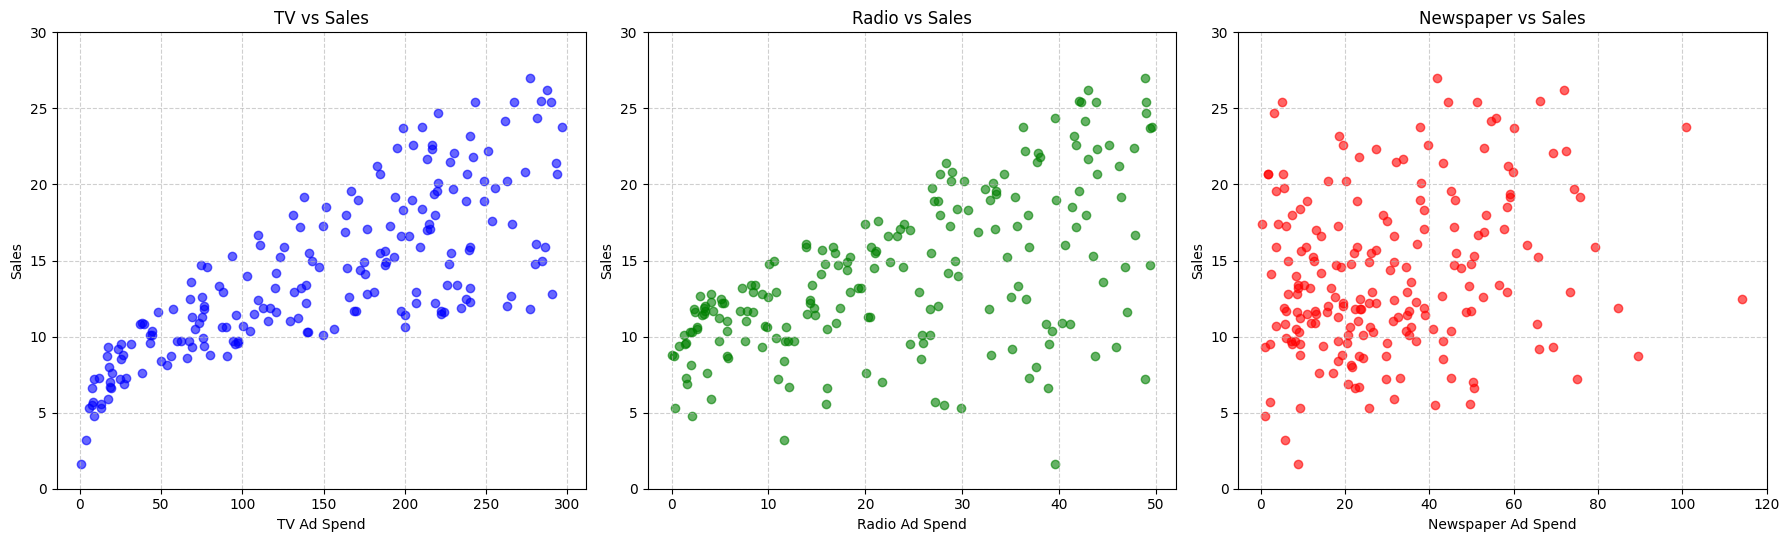

In [20]:
colnames = ['Date', 'TV', 'Radio', 'Newspaper', 'Sales']
df = pd.read_csv('./data/Advertising.csv', names=colnames, header=None)

for col in ['TV', 'Radio', 'Newspaper', 'Sales']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

y_ticks = np.arange(0, 31, 5)

# TV vs Sales
axes[0].scatter(df['TV'], df['Sales'], color='blue', alpha=0.6)
axes[0].set_title('TV vs Sales')
axes[0].set_xlabel('TV Ad Spend')
axes[0].set_ylabel('Sales')
axes[0].set_xticks(np.arange(0, 301, 50))
axes[0].set_yticks(y_ticks)
axes[0].grid(True, linestyle='--', alpha=0.6)

#Radio vs Sales
axes[1].scatter(df['Radio'], df['Sales'], color='green', alpha=0.6)
axes[1].set_title('Radio vs Sales')
axes[1].set_xlabel('Radio Ad Spend')
axes[1].set_ylabel('Sales')
axes[1].set_xticks(np.arange(0, 51, 10))
axes[1].set_yticks(y_ticks)
axes[1].grid(True, linestyle='--', alpha=0.6)

# Newspaper vs Sales
axes[2].scatter(df['Newspaper'], df['Sales'], color='red', alpha=0.6)
axes[2].set_title('Newspaper vs Sales')
axes[2].set_xlabel('Newspaper Ad Spend')
axes[2].set_ylabel('Sales')
axes[2].set_xticks(np.arange(0, 121, 20))
axes[2].set_yticks(y_ticks)
axes[2].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#Discuss what the differences are between the three: (a) boxplot, (b) histogram, and (c) scatter plot with respect to founding.

    a) It shows the and describes the minimum, the first quartile (Q1), median, the third quartile (Q3), and maximum of the data.

    b) It reveals the frequency of data within specific ranges for each field.

    c) Shows the correlation of the two fields for example here we can see that as the tv ad spend increases the tv sales go up.

## Part 2
It is good practice to write a summary of your findings from data anlaysis.

Investment in TV advertising yields the most predictable and significant increases in Sales. Radio is also effective but less consistent, while Newspaper advertising shows minimal impact on driving Sales growth.

TV has the strongest relationship with sales, with a Pearson correlation coefficient (r) of approximately 0.78.Radio shows a moderate relationship with an r value of 0.58. Newspaper shows a very weak relationship with an r value of 0.23.

### Resources

#### Boxplot
https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51


- matplotlib.pyplot boxplot demo
https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html


#### matplotlib.pyplot
- scatter plot
https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.scatter.html


- histogram plot
https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.hist.html


#### pandas DataFrame
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html


- describe()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html


- corr()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html


- hist()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html


- plot.scatter()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html


- pivot()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html